# Time Series Forecasting with Data Library for Python and Workspace Platform

## <a id="overview"></a>Project Overview

**Last Updated**: April 2025

This notebook demonstrates how to extract the time series from [LSEG Workspace platform](https://www.lseg.com/en/data-analytics/products/workspace) using [Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) (LSEG Data Library, aka Data Library version 2). Then, we can use it for forecasting the time series e.g. using [ARIMA](https://www.ibm.com/think/topics/arima-model) (Autoregressive integrated moving average) models in this notebook.

## Introduction to the Data Library for Python

Let me start by give you an introduction to the Data Library. The [Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) provides a set of ease-of-use interfaces offering coders uniform access to the breadth and depth of financial data and services available on the Workspace, RDP, and Real-Time Platforms. The API is designed to provide consistent access through multiple access channels and target both Professional Developers and Financial Coders. Developers can choose to access content from the desktop, through their deployed streaming services, or directly to the cloud. With the Data Library, the same Python code can be used to retrieve data regardless of which access point you choose to connect to the platform.


![Figure-1](images/datalib_image.png "Data Library Diagram") 

The Data Library are available in the following programming languages:

- [Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python)
- [.NET](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-net)
- [TypeScript](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-typescript)

For more deep detail regarding the Data Library for Python, please refer to the following articles and tutorials:

- [Quickstart](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/quick-start).
- [Documentation](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation).
- [Tutorials](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/tutorials).
- [GitHub](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python).


#### Disclaimer

This project is based on Data Library Python versions **2.1.1** using the Desktop Session only.

That covers an overview of the Data Library


## Code Walkthrough

Let start with importing the required libraries. The application needs to import ```lseg.data```, ```matplotlib```, ```pandas```, and ```numpy``` library in order to interact with Data library, DataFrame object and plot graph.

In [3]:
import lseg.data as ld
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [4]:
warnings.filterwarnings('ignore')

The next step is to open a session defined in a **lseg-data.config.json** configuration file in the same location as notebook file.

You should save a json file **lseg-data.config.json** having your Workspace App Key as follows:

```json
{
    "logs": {
        "level": "debug",
        "transports": {
            "console": {
                "enabled": false
            },
            "file": {
                "enabled": false,
                "name": "lseg-data-lib.log"
            }
        }
    },
    "sessions": {
        "default": "desktop.workspace",
        "desktop": {
            "workspace": {
                "app-key": "YOUR APP KEY GOES HERE!"
            }
        }
    }
}
```
This file should be readily available (e.g. in the current working directory) for the next steps.

Please note that the LSEG Workspace desktop application integrates the API proxy that acts as an interface between the Data library and the Workspace Platform. For this reason, the  Workspace application must be running when you use the Data library with Desktop Session. 

### Open the data session

The open_session() function creates and open sessions based on the information contained in the lseg-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [ ]:
ld.open_session()
#ld.open_session(config_name='./lseg-data.devrel.config.json')

<lseg.data.session.Definition object at 0x1c8d189f090 {name='workspace'}>

Next, we defined the variables to store RIC (item code), requested field, and start date data for later use. Please be noticed that I am using the ```TRDPRC_1``` field to get the last trade price (aka close price on each day).

I am demonstrating with [TESLA](https://www.tesla.com/) company (RIC Code: **TSLA.O**).

In [25]:
ric = 'TSLA.O'
start_date = '2020-01-02'
fields = ['TRDPRC_1']

The Data Library provides ```get_history()``` function to access pricing history as well as Fundamental & Reference data history via a single function call.

```python
get_history(universe: str | Iterable[str], fields: str | Iterable[str] | None = None, interval: str | None = None, start: OptDateTime = None, end: OptDateTime = None, adjustments: str | None = None, count: int | None = None, parameters: str | dict | None = None, header_type: HeaderType = HeaderType.TITLE) -> DataFrame
```

You can use the Python built-in [help()](https://docs.python.org/3/library/functions.html#help) function or [Reference Guide document](https://cdn.refinitiv.com/public/lseg-lib-python-doc/2.0.0.2/book/en/sections/access-layer/access/get-history-function.html) to check the parameters options in detail.

```python
help(ld.get_history)
```
    
The ```get_history()``` function returns a pandas.DataFrame. It raises exceptions on error and when no data is available. Please check out the [Usage and Limits Guideline](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation#ReferenceGuide) document.

In [26]:
df = ld.get_history(
    universe=ric,
    fields=fields,
    interval='daily',
    start=start_date,
    count = 10000)
df.head(10)

TSLA.O,TRDPRC_1
Date,
2020-01-03,29.53397
2020-01-06,30.102637
2020-01-07,31.270635
2020-01-08,32.809301
2020-01-09,32.089301
2020-01-10,31.876635
2020-01-13,34.990632
2020-01-14,35.861297
2020-01-15,34.566632


To make our DataFrame easier to read, I am changing a column name from **TRDPRC_1** to be **CLOSE** to represent the close price of each day.

In [27]:
df.rename(
    columns= {
        'TRDPRC_1':'CLOSE'
    },
    inplace= True 
)
df.head(10)

TSLA.O,CLOSE
Date,
2020-01-03,29.53397
2020-01-06,30.102637
2020-01-07,31.270635
2020-01-08,32.809301
2020-01-09,32.089301
2020-01-10,31.876635
2020-01-13,34.990632
2020-01-14,35.861297
2020-01-15,34.566632


That is all for the data preparation process.  We can close the session with Workspace now.

In [28]:
ld.close_session()

### Introduction to ARIMA models

My next point is the ARIMA model. The ARIMA models are a class of statistical models for analyzing and forecasting time series data. ARIMA consists of the following key aspects of the model

- **AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- **I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- **MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- *p*: The number of lag observations included in the model, also called the lag order.
- *d*: The number of times that the raw observations are difference, also called the degree of differencing.
- *q*: The size of the moving average window, also called the order of moving average.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

That’s all I have to say about the ARIMA models.

To use the ARIMA models, you need to import the [statsmodels](https://www.statsmodels.org/stable/index.html) Python library to use the models in this notebook

In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import timedelta, datetime

Next, you can use the time series information retrieved from ```get_history()``` function with ARIMA model to forecast the future time series as an example source code below:

In [ ]:
#function to forecast using ARIMA Model
#input is time series data frame(df) got from eikon.get_timeseries(..)
#and forecast end date which is in format yyyy-mm-dd
def ARIMA_model_forecast(df, forecast_end_date):
    #Set the start and end forecast date time
    #first date is 1 day after time series. The last date is the forecast_end_date parameter
    _e_date = datetime.fromtimestamp(datetime.timestamp(df.index[-1]))
    e_date = _e_date + timedelta(days=1)
    e_date = e_date.strftime('%Y-%m-%d')
    
    decomposition = seasonal_decompose(df.CLOSE, period=1)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    #find differences of time series which is input of ARIMA model
    df['spot_1diff'] = df['CLOSE'].diff()
    df = df[df['spot_1diff'].notnull()]  # drop null rows
    lag_acf = acf(df['spot_1diff'], nlags=50)
    lag_pacf = pacf(df['spot_1diff'], nlags=50, method='ols')
    
    new_spot = df['spot_1diff'].resample('D').ffill()  # resample per day and fill the gaps
    new_spot = new_spot.bfill()
    new_spot = new_spot.astype('float')
    
    #call ARIMA model which p=1,d=0 and q=1 with differences of time series  
    arma_model = ARIMA(new_spot, order=(1, 0, 1))
    results = arma_model.fit()
    
     #focast time series
    residuals = pd.DataFrame(results.resid)
    predictions_ARIMA = pd.Series(results.fittedvalues, copy=True)
    predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()
    predictions_ARIMA_final = pd.Series(
        df['CLOSE'].iloc[0], 
        index=new_spot.index
    )
    predictions_ARIMA_final = predictions_ARIMA_final.add(predictions_ARIMA_cumsum, fill_value=0)
    
    new_spot = df.CLOSE.resample('D', 
                                 label='right').ffill().astype('float')
    
    es_model = ExponentialSmoothing(new_spot, 
                                    trend='add', 
                                    damped=False, 
                                    seasonal='mul', 
                                    seasonal_periods=30)
    es_results = es_model.fit()
    
    predicted_values = es_model.predict(
        params=es_results.params, 
        start=e_date, end=forecast_end_date)
    
     #create data frame from forecast timeseries  
    preds = pd.DataFrame(
        index=pd.date_range(
            start=e_date, end=forecast_end_date),
            data=predicted_values,
            columns=['CLOSE']
    )
    
    #Plot graph of past and forecast timeseries
    plt.figure(figsize=(16, 7))
    plt.plot(new_spot, label='Actual')
    plt.plot(preds, label='Forecast', color='pink')
    plt.legend(loc='best')
    plt.show()

    return preds

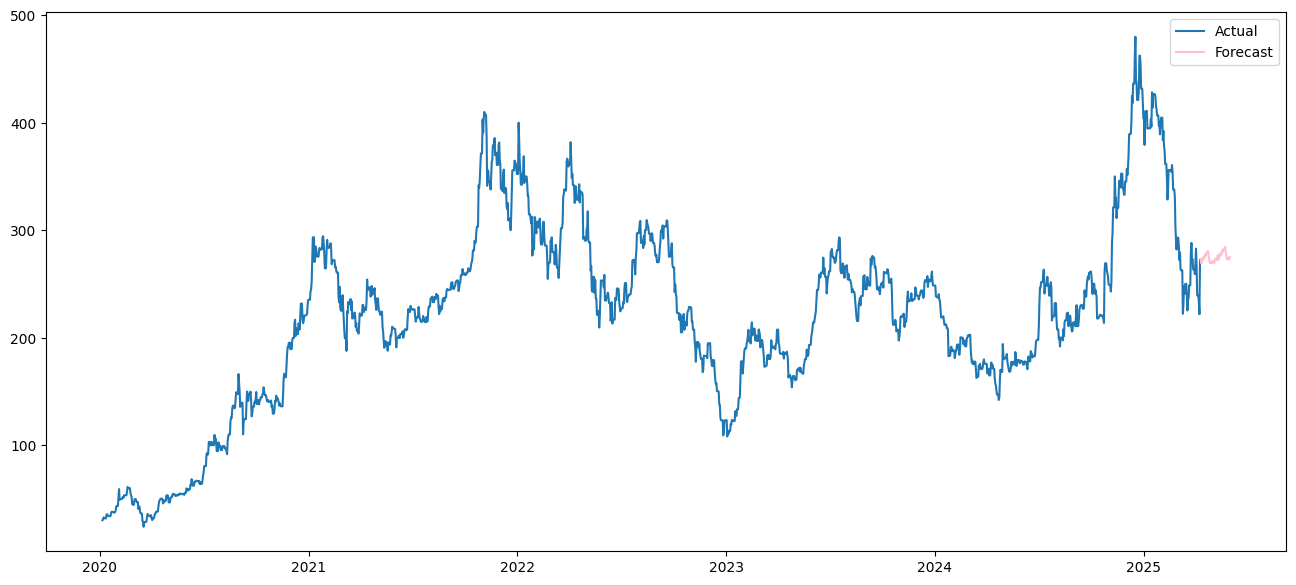

,CLOSE
2025-04-10,273.226973
2025-04-11,269.233817
2025-04-12,269.571644
2025-04-13,272.448169
2025-04-14,273.669183
2025-04-15,274.885914
2025-04-16,273.404726
2025-04-17,274.541060
2025-04-18,277.568316
2025-04-19,276.298453


In [35]:
#end date that you want to forecast
forecast_end_date = '2025-5-31'
#call the function to forecast time series with ARIMA model
forecast = ARIMA_model_forecast(df,forecast_end_date)
#display forecast time series
forecast

## <a id="summary"></a>Conclusion

At the end of this project, you should be able to get time series from LSEG Workspace platform using ```get_history``` function in Data Library for Python. Then, you can use the time series with ARIMA model to make forecasts or use the time series for other purposes.

## <a id="references"></a>References

You can find more detail regarding the Data Library and related technologies for this Notebook from the following resources:

- [LSEG Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) on the [LSEG Developer Community](https://developers.lseg.com/)
- [Data Library for Python - Reference Guide](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation#reference-guide)
- [The Data Library for Python  - Quick Reference Guide (Access layer)](https://developers.lseg.com/en/article-catalog/article/the-data-library-for-python-quick-reference-guide-access-layer) article.
- [Essential Guide to the Data Libraries - Generations of Python library (EDAPI, RDP, RD, LD)](https://developers.lseg.com/en/article-catalog/article/essential-guide-to-the-data-libraries) article.
- [Upgrade from using Eikon Data API to the Data library](https://developers.lseg.com/en/article-catalog/article/Upgrade-from-using-Eikon-Data-API-to-the-Data-library) article.
- [Data Library for Python Examples on GitHub](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python) repository.
- [statsmodels library](https://www.statsmodels.org/stable/index.html) page.
- [What are ARMIA models? - IBM document](https://www.ibm.com/think/topics/arima-model) page.
- [How to Create an ARIMA Model for Time Series Forecasting in Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) blogpost.

For any question related to this example or Data Library, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com).
